In [1]:
from utils import *

In [2]:
root_path = generate_root_path()

## Creating model

In [3]:
def calc_acc(labels, predicted):
    '''
    Calculating mean class error, e.g. predicted classes are 1vs0, 0vs0, 0vs0, 0vs0, then we have acc=0.25
    Inputs: 
        labels = target labels
        predicted = predicted binary probability distribution for the input
    Output:
        mean class error
    '''
    acc = np.sum(np.array(labels) == np.argmax(np.array(predicted), axis=1)) / len(labels)
    return np.round(acc * 100, 2)

In [4]:
#creating feature extractors
model_gap = model_inceptionresnet_multigap()
model_cnn = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1", trainable=False)])

#THERE ARE 2 BEST SOLUTIONS (UNCOMMENT THE ONE YOU WANT TO USE!)

#creating dense and loading the weights
model = fc_model_softmax(input_num=5000)
weights_path = f'models/Multigap_CNN/best_solution_2.hdf5'
model.load_weights(weights_path)
indxs = np.load('models/Indices/best_solution_2.npy') #loading indices of 19k features recived from GA
for_all = True

# # creating dense and loading the weights
# model = fc_model_softmax(input_num=5000)
# weights_path = f'models/Multigap_CNN/best_solution_1.hdf5'
# model.load_weights(weights_path)
# indxs = np.load('models/Indices/best_solution_1.npy') #loading indices of 19k features recived from GA
# for_all = False

## Giving path of folder

In [5]:
#loading paths of benchmark data
good_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'benchmark_connected', 'images', 'good', '*'))
bad_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'benchmark_connected', 'images', 'bad', '*'))

good_alm_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'alm', 'splitted', 'alm_bench', 'images', 'good', '*'))
bad_alm_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'alm', 'splitted', 'alm_bench', 'images', 'bad', '*'))

good_rand_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'Sven_custom_data', 'images', 'good', '*'))
bad_rand_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'Sven_custom_data', 'images', 'bad', '*'))

bad_coco_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'Coco', 'images', 'bad', '*'))

good_test_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'test', 'images', 'good', '*'))
bad_test_imgs_path = glob(os.path.join(root_path, 'Data', 'AesthAI', 'test', 'images', 'bad', '*'))

#cretae labels for loaded benchmark datas
paths_bench = good_imgs_path + bad_imgs_path
labels_bench = np.concatenate((np.ones(len(good_imgs_path)), np.zeros(len(bad_imgs_path))))

paths_alm_bench = good_alm_imgs_path + bad_alm_imgs_path
labels_alm_bench = np.concatenate((np.ones(len(good_alm_imgs_path)), np.zeros(len(bad_alm_imgs_path))))

paths_rand_bench = good_rand_imgs_path + bad_rand_imgs_path
labels_rand_bench = np.concatenate((np.ones(len(good_rand_imgs_path)), np.zeros(len(bad_rand_imgs_path))))

paths_coco_bench = bad_coco_imgs_path
labels_coco_bench = np.zeros(len(bad_coco_imgs_path))

paths_test_bench = good_test_imgs_path + bad_test_imgs_path
labels_test_bench = np.concatenate((np.ones(len(good_test_imgs_path)), np.zeros(len(bad_test_imgs_path))))


## Prediction on benchmark

In [6]:
#resize_max *for_all=True (996, 996) means, max(height, width) resizes with 996 and another with aspect ratio
predicted = predict_from_path(model_gap, model, paths_bench, resize_func=resize_max, for_all=for_all,
                              size=(996, 996), model_cnn=model_cnn, take=indxs)

In [7]:
acc = calc_acc(labels_bench, predicted)
print(f'Accuracy: {acc} %')

Accuracy: 94.76 %


In [8]:
#Precision and Recall
pred = np.argmax(predicted, axis=1)
calc_metrics(labels_bench, pred)

Precision: 95.94 %
Recall: 93.63 %


## Prediction on Coco

In [9]:
predicted = predict_from_path(model_gap, model, paths_coco_bench, resize_func=resize_max, for_all=True,
                              size=(996, 996), model_cnn=model_cnn, take=indxs)

In [10]:
acc = calc_acc(labels_coco_bench, predicted)
print(f'Accuracy: {acc} %')

Accuracy: 98.9 %


## Prediction on alm benchmark

In [11]:
predicted = predict_from_path(model_gap, model, paths_alm_bench, resize_func=resize_max, for_all=for_all,
                              size=(996, 996), model_cnn=model_cnn, take=indxs)

In [12]:
acc = calc_acc(labels_alm_bench, predicted)
print(f'Accuracy: {acc} %')

Accuracy: 96.0 %


In [13]:
# Precision and Recall
pred = np.argmax(predicted, axis=1)
calc_metrics(labels_alm_bench, pred)

Precision: 96.0 %
Recall: 96.0 %


## Prediction on Sven custom data

In [14]:
predicted = predict_from_path(model_gap, model, paths_rand_bench, resize_func=resize_max, for_all=for_all,
                              size=(996, 996), model_cnn=model_cnn, take=indxs)

In [15]:
acc = calc_acc(labels_rand_bench, predicted)
print(f'Accuracy: {acc} %')

Accuracy: 96.5 %


In [16]:
#Precision and Recall
pred = np.argmax(predicted, axis=1)
calc_metrics(labels_rand_bench, pred)

Precision: 98.95 %
Recall: 94.0 %


## Prediction on test data

In [17]:
predicted = predict_from_path(model_gap, model, paths_test_bench, resize_func=resize_max, for_all=for_all,
                              size=(996, 996), model_cnn=model_cnn, take=indxs)

In [18]:
acc = calc_acc(labels_test_bench, predicted)
print(f'Accuracy: {acc} %')

Accuracy: 96.86 %


In [19]:
#Precision and Recall
pred = np.argmax(predicted, axis=1)
calc_metrics(labels_test_bench, pred)

Precision: 96.59 %
Recall: 97.14 %


## Visualizing predictions on benchmark

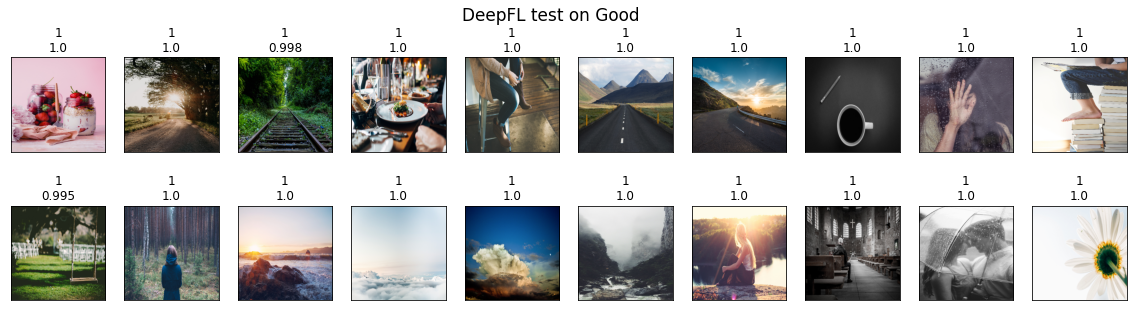

In [20]:
start = 40
plot_pred_orig(model_gap, model, good_imgs_path[start:start+20], resize_func=resize_max, for_all=for_all,
               label='Good', size=(996, 996), model_cnn=model_cnn, take=indxs)

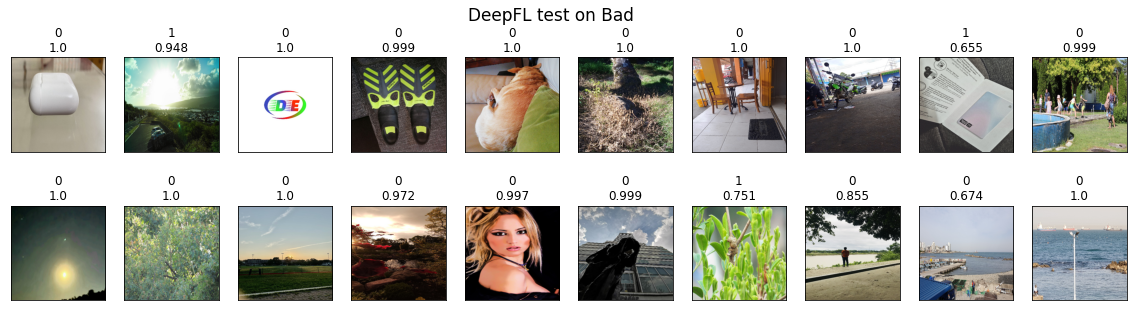

In [21]:
start = 60
plot_pred_orig(model_gap, model, bad_imgs_path[start:start+20], resize_func=resize_max, for_all=for_all,
              label='Bad', size=(996, 996), model_cnn=model_cnn, take=indxs)

## Visualizing predictions on Coco


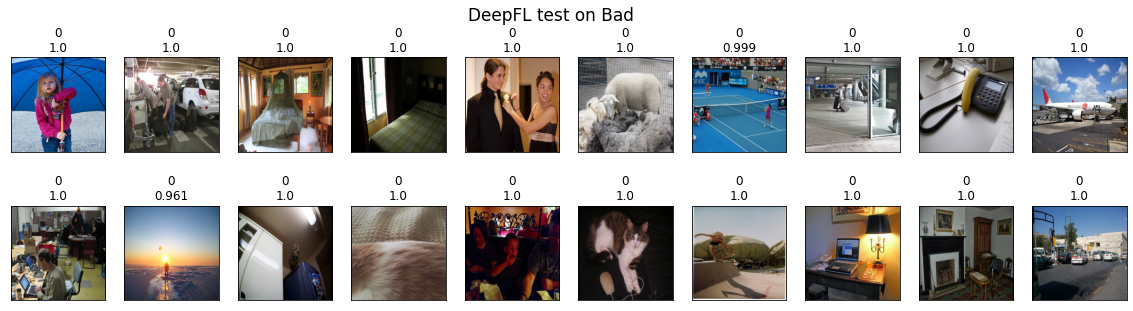

In [22]:
start = 20
plot_pred_orig(model_gap, model, bad_coco_imgs_path[start:start+20], resize_func=resize_max, label='Bad',
               size=(996, 996), for_all=True, model_cnn=model_cnn, take=indxs)